# Gaussian_Mixture

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import cross_val_score
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectPercentile, f_classif

### Model 1
#### Read CSV

In [2]:
train_m1 = pd.read_csv('../../../../Data_AA2/train_m1.csv', sep = ',')
train_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.37521,-0.756929,-1.925779,0.580938,-0.515445,0.939376,-0.453565,-0.763196,1.192581,0.001762,...,-0.561357,0.196894,-0.348973,0.188003,-0.118566,-0.651221,-0.324357,0.259352,0.395979,0
1,0.37521,1.471189,-0.283258,-0.824024,-0.515445,0.939376,-0.453565,1.310279,-0.098471,-0.713715,...,0.148956,0.196894,-0.348973,0.188003,0.837519,1.529013,-0.281151,0.769787,0.843536,0
2,0.37521,0.078615,-0.283258,1.049258,-0.515445,0.939376,-0.453565,-0.763196,-1.389523,1.432715,...,-0.561357,0.196894,-0.348973,0.188003,0.837519,-0.230686,0.950220,0.773829,0.843536,0
3,0.37521,-0.756929,-0.283258,-0.824024,-0.515445,-1.090085,-0.453565,1.310279,1.192581,1.432715,...,-0.206200,0.196894,-0.348973,0.188003,-0.118566,-0.651221,-0.324357,0.284758,0.395979,0
4,0.37521,-1.035444,-1.925779,1.049258,1.938451,0.939376,-0.453565,1.310279,0.762230,-0.713715,...,0.859269,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.710313,0.329470,0


In [3]:
test_m1 = pd.read_csv('../../../../Data_AA2/test_m1.csv', sep = ',')
test_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.37521,1.471189,-0.283258,0.580938,-0.515445,0.939376,-0.453565,1.310279,0.762230,0.717238,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.710313,0.329470,0
1,0.37521,0.914159,-1.925779,-0.355703,-0.515445,-1.090085,-0.453565,1.310279,0.762230,1.432715,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.709736,0.329470,0
2,0.37521,1.471189,-0.283258,0.580938,1.938451,0.939376,-0.453565,1.310279,0.762230,-1.429191,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.711468,0.329470,0
3,0.37521,-0.756929,1.359263,-1.760665,-0.515445,-1.090085,-0.453565,-0.763196,0.762230,1.432715,...,-0.561357,0.196894,1.662067,-2.562036,-1.202130,-1.180338,-1.231682,-1.354522,-0.943918,0
4,0.37521,-1.035444,-0.283258,1.049258,1.938451,0.939376,-0.453565,-0.763196,-1.389523,0.717238,...,0.148956,0.196894,-0.348973,0.188003,0.837519,-0.230686,0.950220,0.771519,0.843536,0


Separar o target do dataset

In [4]:
data1 = pd.concat([train_m1, test_m1])
data1_X = data1.drop(columns=['y']) 
data1_Y = data1['y']

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 12356
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  float64
 2   marital         41188 non-null  float64
 3   education       41188 non-null  float64
 4   default         41188 non-null  float64
 5   housing         41188 non-null  float64
 6   loan            41188 non-null  float64
 7   contact         41188 non-null  float64
 8   month           41188 non-null  float64
 9   day_of_week     41188 non-null  float64
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  float64
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Create and fit the GaussianMixture model, with 2 clusters

In [6]:
# Create model with best parameters
gmixture_model = GaussianMixture(n_components=2)#2 classes

# Fit the best model
gmixture_model.fit(data1_X)
gmixture_model

GaussianMixture(n_components=2)

Predict dos valores na tentativa de dividir as entradas pelos 2 clusters, com uma matriz de confusão 

In [7]:
predictions = gmixture_model.predict(data1_X)

# Confusion matrix
confusion = pd.crosstab(data1_Y,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted      0      1    All
Actual                        
0          10962  25586  36548
1           3385   1255   4640
All        14347  26841  41188


In [8]:
# Accuracy
score = accuracy_score(data1_Y,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.296616


In [9]:
# Report
print(classification_report(data1_Y,predictions))

              precision    recall  f1-score   support

           0       0.76      0.30      0.43     36548
           1       0.05      0.27      0.08      4640

    accuracy                           0.30     41188
   macro avg       0.41      0.29      0.26     41188
weighted avg       0.68      0.30      0.39     41188



#### Gráfico que mostra a divisão das entradas pelos 2 clusters

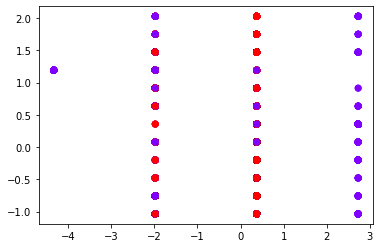

In [11]:
plt.scatter(data1_X.iloc[:,0], data1_X.iloc[:,1], c=predictions, cmap='rainbow')

### Model 2
#### Read CSV

In [12]:
train_m2 = pd.read_csv('../../../../Data_AA2/train_m2.csv', sep = ',')
train_m2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.836283,-1.028419,-1.910223,-0.420230,-0.009681,0.917326,-0.43243,-0.699689,1.145570,-0.014944,...,-0.187885,0.213335,-0.373253,0.190666,-0.011801,-0.548958,-0.289686,0.352458,0.470978,0
1,0.406241,-1.028419,1.292265,1.086428,-0.009681,-1.090125,-0.43243,-0.699689,-1.366988,1.415229,...,-0.556353,0.213335,-0.373253,0.190666,0.919127,-0.132418,0.937972,0.851480,0.899436,0
2,0.406241,0.353247,-1.910223,1.086428,-0.009681,0.917326,-0.43243,-0.699689,-0.529469,0.700143,...,-0.187885,0.213335,-0.373253,0.190666,0.919127,0.676764,-0.435341,0.849794,0.899436,0
3,0.406241,-0.475752,-0.308979,1.086428,-0.009681,-1.090125,-0.43243,-0.699689,-0.529469,1.415229,...,0.549049,0.213335,-0.373253,0.190666,0.919127,0.676764,-0.435341,0.850918,0.899436,0
4,0.406241,0.076914,-0.308979,1.086428,-0.009681,0.917326,-0.43243,-0.699689,-1.366988,0.700143,...,-0.556353,0.213335,-0.373253,0.190666,0.919127,-0.132418,0.937972,0.852604,0.899436,0


In [13]:
test_m2 = pd.read_csv('../../../../Data_AA2/test_m2.csv', sep = ',')
test_m2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.406241,-0.752086,1.292265,-0.922449,-0.009681,0.917326,-0.43243,1.429206,-0.110709,-0.014944,...,2.759852,0.213335,-0.373253,0.190666,0.919127,1.610567,-0.248071,0.796408,0.899436,0
1,0.406241,1.458580,1.292265,0.584209,-0.009681,0.917326,-0.43243,1.429206,-0.110709,1.415229,...,0.180582,0.213335,-0.373253,0.190666,0.919127,1.610567,-0.248071,0.848670,0.899436,0
2,0.406241,-0.475752,-0.308979,1.086428,-0.009681,0.917326,-0.43243,-0.699689,-1.785748,1.415229,...,-0.556353,0.213335,3.485114,-2.416003,-1.066853,-0.762350,-1.350882,-1.142923,-0.811744,0
3,0.406241,-0.752086,-1.910223,-0.420230,-0.009681,0.917326,-0.43243,1.429206,-0.110709,1.415229,...,-0.556353,0.213335,-0.373253,0.190666,0.919127,1.610567,-0.248071,0.848670,0.899436,0
4,0.406241,0.076914,-0.308979,0.584209,-0.009681,-1.090125,-0.43243,1.429206,0.726810,-1.445118,...,-0.556353,0.213335,-0.373253,0.190666,0.732941,0.806507,0.875548,0.792474,0.407306,0


Separar o target do dataset

In [14]:
data2 = pd.concat([train_m2, test_m2], ignore_index=True)
data2_X = data2.drop(columns=['y']) 
data2_Y = data2['y']

In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30488 entries, 0 to 30487
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  float64
 1   job             30488 non-null  float64
 2   marital         30488 non-null  float64
 3   education       30488 non-null  float64
 4   default         30488 non-null  float64
 5   housing         30488 non-null  float64
 6   loan            30488 non-null  float64
 7   contact         30488 non-null  float64
 8   month           30488 non-null  float64
 9   day_of_week     30488 non-null  float64
 10  duration        30488 non-null  float64
 11  campaign        30488 non-null  float64
 12  pdays           30488 non-null  float64
 13  previous        30488 non-null  float64
 14  poutcome        30488 non-null  float64
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

#### Create and fit the GaussianMixture model, with 2 clusters

In [16]:
# Create model with best parameters
gmixture_model = GaussianMixture(n_components=2)#2 classes

# Fit the best model
gmixture_model.fit(data2_X)
gmixture_model

GaussianMixture(n_components=2)

Predict dos valores na tentativa de dividir as entradas pelos 2 clusters, com uma matriz de confusão (pouco real)

In [17]:
predictions = gmixture_model.predict(data2_X)

# Confusion matrix
confusion = pd.crosstab(data2_Y,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted      0      1    All
Actual                        
0           8971  17658  26629
1           2962    897   3859
All        11933  18555  30488


In [18]:
# Accuracy
score = accuracy_score(data2_Y,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.323668


In [19]:
# Report
print(classification_report(data2_Y,predictions))

              precision    recall  f1-score   support

           0       0.75      0.34      0.47     26629
           1       0.05      0.23      0.08      3859

    accuracy                           0.32     30488
   macro avg       0.40      0.28      0.27     30488
weighted avg       0.66      0.32      0.42     30488



#### Gráfico que mostra a divisão das entradas pelos 2 clusters

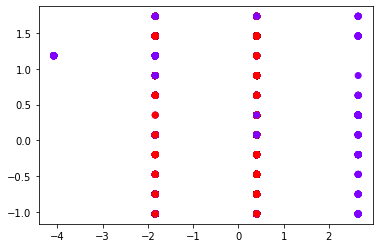

In [20]:
plt.scatter(data2_X.iloc[:,0], data2_X.iloc[:,1], c=predictions, cmap='rainbow')

### Model 3
#### Read CSV

In [21]:
train_m3 = pd.read_csv('../../../../Data_AA2/train_m3.csv', sep = ',')
train_m3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.430712,1.468709,1.315671,0.575506,-0.009193,0.963609,-0.409284,1.511648,0.731850,0.727884,...,-0.167650,0.249588,-0.390321,0.162454,-0.975689,-1.023979,-1.142809,-1.113536,-0.696420,0
1,0.430712,-1.026811,1.315671,1.079601,-0.009193,0.963609,-0.409284,-0.661530,-0.508577,-0.709064,...,0.204000,0.249588,-0.390321,0.162454,0.971222,0.699099,-0.434338,0.905339,0.940431,0
2,0.430712,-1.026811,1.315671,1.079601,-0.009193,0.963609,-0.409284,-0.661530,-1.335529,0.009410,...,-0.167650,0.249588,-0.390321,0.162454,0.971222,-0.097719,0.901635,0.905889,0.940431,0
3,2.595616,0.359589,-0.284073,-1.944969,-0.009193,-1.037765,-0.409284,-0.661530,-0.922053,1.446358,...,-0.167650,0.249588,-0.390321,0.162454,-1.705780,-1.326568,1.529138,-1.430308,-1.655691,1
4,0.430712,1.468709,-0.284073,1.079601,-0.009193,-1.037765,-0.409284,-0.661530,-1.335529,-0.709064,...,0.947301,0.249588,-0.390321,0.162454,0.971222,-0.097719,0.901635,0.906989,0.940431,0


In [22]:
test_m3 = pd.read_csv('../../../../Data_AA2/test_m3.csv', sep = ',')
test_m3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.430712,-0.749531,-0.284073,-1.440874,-0.009193,0.963609,-0.409284,-0.661530,-0.508577,-0.709064,...,0.947301,0.249588,-0.390321,0.162454,0.971222,0.699099,-0.434338,0.904239,0.940431,0
1,0.430712,-1.026811,-0.284073,-0.432684,-0.009193,0.963609,-0.409284,1.511648,0.731850,0.009410,...,0.575650,0.249588,-0.390321,0.162454,0.788699,0.826859,0.840909,0.849244,0.469678,0
2,0.430712,-1.026811,-0.284073,-1.440874,-0.009193,0.963609,2.443291,1.511648,0.731850,0.727884,...,-0.539300,0.249588,-0.390321,0.162454,0.788699,0.826859,0.840909,0.847594,0.469678,0
3,0.430712,-1.026811,-0.284073,1.079601,-0.009193,0.963609,-0.409284,-0.661530,-0.095102,-0.709064,...,-0.539300,0.249588,1.459600,-2.255863,-1.644939,-0.906305,-0.049740,-1.155332,-0.986993,0
4,0.430712,-0.749531,-0.284073,-1.440874,-0.009193,0.963609,-0.409284,-0.661530,0.731850,0.727884,...,0.947301,0.249588,-0.390321,0.162454,-0.975689,-1.023979,-1.142809,-1.084388,-0.696420,0


Separar o target do dataset

In [23]:
data3 = pd.concat([train_m3, test_m3], ignore_index=True)
data3_X = data3.drop(columns=['y']) 
data3_Y = data3['y']

In [24]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32816 entries, 0 to 32815
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32816 non-null  float64
 1   job             32816 non-null  float64
 2   marital         32816 non-null  float64
 3   education       32816 non-null  float64
 4   default         32816 non-null  float64
 5   housing         32816 non-null  float64
 6   loan            32816 non-null  float64
 7   contact         32816 non-null  float64
 8   month           32816 non-null  float64
 9   day_of_week     32816 non-null  float64
 10  duration        32816 non-null  float64
 11  campaign        32816 non-null  float64
 12  pdays           32816 non-null  float64
 13  previous        32816 non-null  float64
 14  poutcome        32816 non-null  float64
 15  emp.var.rate    32816 non-null  float64
 16  cons.price.idx  32816 non-null  float64
 17  cons.conf.idx   32816 non-null 

#### Create and fit the GaussianMixture model, with 2 clusters

In [25]:
# Create model with best parameters
gmixture_model = GaussianMixture(n_components=2)#2 classes

# Fit the best model
gmixture_model.fit(data3_X)
gmixture_model

GaussianMixture(n_components=2)

Predict dos valores na tentativa de dividir as entradas pelos 2 clusters, com uma matriz de confusão (pouco real)

In [26]:
predictions = gmixture_model.predict(data3_X)

# Confusion matrix
confusion = pd.crosstab(data3_Y,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted      0      1    All
Actual                        
0           8404  18225  26629
1           4752   1435   6187
All        13156  19660  32816


In [27]:
# Accuracy
score = accuracy_score(data3_Y,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.299823


In [28]:
# Report
print(classification_report(data3_Y,predictions))

              precision    recall  f1-score   support

           0       0.64      0.32      0.42     26629
           1       0.07      0.23      0.11      6187

    accuracy                           0.30     32816
   macro avg       0.36      0.27      0.27     32816
weighted avg       0.53      0.30      0.36     32816



#### Gráfico que mostra a divisão das entradas pelos 2 clusters

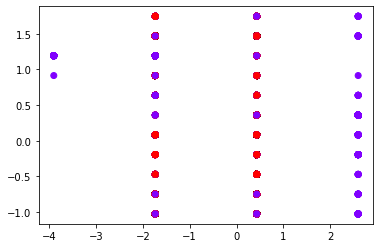

In [29]:
plt.scatter(data3_X.iloc[:,0], data3_X.iloc[:,1], c=predictions, cmap='rainbow')

### Model 4
#### Read CSV

In [2]:
train_m4 = pd.read_csv('../../../../Data_AA2/train_m4.csv', sep = ',')
train_m4.head()

,job,marital,education,default,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.038917,1.363073,-0.351284,-0.512695,1.325358,0.350664,-0.204429,0.196894,-0.351367,0.195096,0.840943,1.537557,-0.279432,0.778118,0.846583,0
1,-0.761163,-0.286126,-0.820426,-0.512695,1.325358,1.966453,0.156584,0.196894,-0.351367,0.195096,0.840943,0.594054,-0.473904,0.774087,0.846583,1
2,-1.038917,-0.286126,1.056145,-0.512695,-0.754513,-0.457231,-0.565442,0.196894,1.645136,-2.544702,-1.193288,-1.173936,-1.230186,-1.325914,-0.938246,0
3,-1.038917,1.363073,1.056145,-0.512695,1.325358,0.350664,-0.565442,0.196894,-0.351367,0.195096,-1.193288,-0.860010,-1.424658,-1.272939,-0.938246,0
4,-1.038917,-0.286126,1.056145,1.948838,1.325358,-1.265125,0.517596,0.196894,-0.351367,0.195096,0.840943,1.537557,-0.279432,0.771208,0.846583,0


In [3]:
test_m4 = pd.read_csv('../../../../Data_AA2/test_m4.csv', sep = ',')
test_m4.head()

,job,marital,education,default,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.349854,-0.286126,-0.351284,-0.512695,-0.754513,1.158558,-0.565442,0.196894,-0.351367,0.195096,-0.112602,-0.644401,-0.322648,0.265066,0.399684,1
1,0.905362,-0.286126,-0.351284,1.948838,-0.754513,-1.265125,-0.565442,0.196894,-0.351367,0.195096,-0.112602,-0.644401,-0.322648,0.233396,0.399684,0
2,-0.761163,-0.286126,-1.758712,1.948838,1.325358,-0.457231,-0.565442,0.196894,-0.351367,0.195096,0.650234,0.725144,0.887403,0.714778,0.333271,0
3,1.460871,1.363073,1.056145,-0.512695,-0.754513,1.966453,-0.565442,0.196894,1.645136,-2.544702,-1.193288,-1.173936,-1.230186,-1.333976,-0.938246,1
4,-1.038917,-1.935325,-0.351284,-0.512695,1.325358,-1.265125,-0.204429,0.196894,1.645136,-2.544702,-1.193288,-1.173936,-1.230186,-1.333976,-0.938246,0


Separar o target do dataset

In [4]:
data4 = pd.concat([train_m4, test_m4], ignore_index=True)
data4_X = data4.drop(columns=['y']) 
data4_Y = data4['y']

In [5]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             41188 non-null  float64
 1   marital         41188 non-null  float64
 2   education       41188 non-null  float64
 3   default         41188 non-null  float64
 4   contact         41188 non-null  float64
 5   duration        41188 non-null  float64
 6   campaign        41188 non-null  float64
 7   pdays           41188 non-null  float64
 8   previous        41188 non-null  float64
 9   poutcome        41188 non-null  float64
 10  emp.var.rate    41188 non-null  float64
 11  cons.price.idx  41188 non-null  float64
 12  cons.conf.idx   41188 non-null  float64
 13  euribor3m       41188 non-null  float64
 14  nr.employed     41188 non-null  float64
 15  y               41188 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 5.0 MB


#### Create and fit the GaussianMixture model, with 2 clusters

In [6]:
# Create model with best parameters
gmixture_model = GaussianMixture(n_components=2)#2 classes

# Fit the best model
gmixture_model.fit(data4_X)
gmixture_model

GaussianMixture(n_components=2)

Predict dos valores na tentativa de dividir as entradas pelos 2 clusters, com uma matriz de confusão (pouco real)

In [7]:
predictions = gmixture_model.predict(data4_X)

# Confusion matrix
confusion = pd.crosstab(data4_Y,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted      0      1    All
Actual                        
0          10962  25586  36548
1           3385   1255   4640
All        14347  26841  41188


In [8]:
# Accuracy
score = accuracy_score(data4_Y,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.296616


In [9]:
# Report
print(classification_report(data4_Y,predictions))

              precision    recall  f1-score   support

           0       0.76      0.30      0.43     36548
           1       0.05      0.27      0.08      4640

    accuracy                           0.30     41188
   macro avg       0.41      0.29      0.26     41188
weighted avg       0.68      0.30      0.39     41188



#### Gráfico que mostra a divisão das entradas pelos 2 clusters

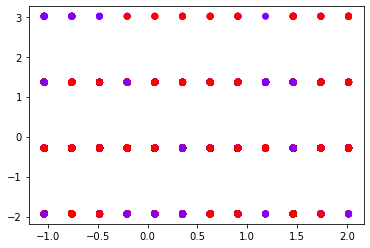

In [10]:
plt.scatter(data4_X.iloc[:,0], data4_X.iloc[:,1], c=predictions, cmap='rainbow')

### Model 5
#### Read CSV

In [39]:
train_m5 = pd.read_csv('../../../../Data_AA2/train_m5.csv', sep = ',')
train_m5.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.542856,-1.154683,1.504582,1.376593,0.689601,-0.010201,0.928497,-0.429774,-0.758480,1.194001,...,-0.204674,-5.083824,1.660200,2.938971,-1.947193,-0.804593,2.226079,-1.425183,-2.064840,1.0
1,-0.506227,-0.963193,-0.754426,1.376593,-1.766225,-0.010201,0.928497,-0.429774,-0.758480,-0.531893,...,-0.204674,0.196704,-0.351282,0.193233,0.763192,0.898330,-0.539387,0.760455,0.845530,0.0
2,-1.116306,1.334690,1.504582,-1.926794,1.180766,-0.010201,-1.077009,2.326804,1.318426,0.762528,...,-0.204674,0.196704,-0.351282,0.193233,0.763192,0.898330,0.949710,0.760455,0.332751,0.0
3,-1.179061,-0.197232,-1.036802,-0.275101,1.180766,-0.010201,0.928497,2.326804,1.318426,0.762528,...,-0.204674,0.196704,-0.351282,0.193233,0.763192,0.898330,0.949710,0.760455,0.332751,0.0
4,0.880355,-0.388722,-0.754426,1.376593,0.689601,-0.010201,0.928497,-0.429774,-0.758480,0.762528,...,-0.560688,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.177571,-1.425183,-0.942269,0.0


In [40]:
test_m5 = pd.read_csv('../../../../Data_AA2/test_m5.csv', sep = ',')
test_m5.head()

,level_0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,0.090003,0.939830,-0.275101,-0.292730,-0.010201,0.928497,-0.429774,1.318426,0.762528,...,0.507356,0.196704,-0.351282,0.193233,0.763192,0.898330,0.949710,0.760455,0.332751,0.0
1,2,-0.580213,-1.036802,1.376593,-0.292730,-0.010201,-1.077009,-0.429774,-0.758480,0.762528,...,2.287429,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.177571,-1.425183,-0.942269,0.0
2,3,0.760219,-0.754426,-0.275101,-1.275060,-0.010201,0.928497,-0.429774,-0.758480,0.762528,...,-0.204674,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.177571,-1.425183,-0.942269,0.0
3,4,3.153847,0.375078,-1.926794,-1.766225,-0.010201,-1.077009,2.326804,-0.758480,-1.826313,...,-0.560688,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.390299,-1.425183,-0.942269,1.0
4,5,1.813416,0.375078,-0.275101,0.689601,-0.010201,-1.077009,-0.429774,-0.758480,-1.394840,...,-0.560688,0.196704,-0.351282,0.193233,0.763192,-0.804593,0.949710,0.760455,0.845530,0.0


Separar o target do dataset e remover as colunas 'index' e 'level_0'

In [41]:
data5 = pd.concat([train_m5, test_m5], ignore_index=True)
data5 = data5.drop(columns=['index']) 
data5 = data5.drop(columns=['level_0']) 
data5_X = data5.drop(columns=['y']) 
data5_Y = data5['y']

In [42]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37979 entries, 0 to 37978
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37979 non-null  float64
 1   job             37979 non-null  float64
 2   marital         37979 non-null  float64
 3   education       37979 non-null  float64
 4   default         37979 non-null  float64
 5   housing         37979 non-null  float64
 6   loan            37979 non-null  float64
 7   contact         37979 non-null  float64
 8   month           37979 non-null  float64
 9   day_of_week     37979 non-null  float64
 10  duration        37979 non-null  float64
 11  campaign        37979 non-null  float64
 12  pdays           37979 non-null  float64
 13  previous        37979 non-null  float64
 14  poutcome        37979 non-null  float64
 15  emp.var.rate    37979 non-null  float64
 16  cons.price.idx  37979 non-null  float64
 17  cons.conf.idx   37979 non-null 

#### Create and fit the GaussianMixture model, with 2 clusters

In [43]:
# Create model with best parameters
gmixture_model = GaussianMixture(n_components=2)#2 classes

# Fit the best model
gmixture_model.fit(data5_X)
gmixture_model

GaussianMixture(n_components=2)

Predict dos valores na tentativa de dividir as entradas pelos 2 clusters, com uma matriz de confusão (pouco real)

In [44]:
predictions = gmixture_model.predict(data5_X)

# Confusion matrix
confusion = pd.crosstab(data5_Y,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted      0      1    All
Actual                        
0.0        23208  10376  33584
1.0         1153   3242   4395
All        24361  13618  37979


In [45]:
# Accuracy
score = accuracy_score(data5_Y,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.696438


In [46]:
# Report
print(classification_report(data5_Y,predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.69      0.80     33584
         1.0       0.24      0.74      0.36      4395

    accuracy                           0.70     37979
   macro avg       0.60      0.71      0.58     37979
weighted avg       0.87      0.70      0.75     37979



#### Gráfico que mostra a divisão das entradas pelos 2 clusters

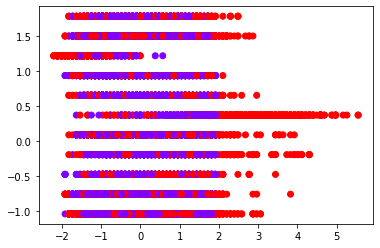

In [47]:
plt.scatter(data5_X.iloc[:,0], data5_X.iloc[:,1], c=predictions, cmap='rainbow')